**DATASET:**

The dataset is collected from different open sources:



1.   There are 902 normal x-ray images and 1440 pneumonia x-ray images.
2.   There are a total of 615 covid-19 x-ray images obtained from the following sources:


*   280 images from the GitHub repository shared by Dr. Joseph Cohen (https://github.com/ieee8023/covid-chestxray-dataset)
*   1329 images from kaggle repository (https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)
*   60 images from the github repository (https://github.com/agchung/Figure1-COVID-chestxray-dataset)
* 1288 images from Kaggle repository (https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/OELP/normal_images_kaggle_500.zip' -d '/content/drive/MyDrive/OELP' 
!unzip '/content/drive/MyDrive/OELP/pneumonia_images_kaggle_500.zip' -d '/content/drive/MyDrive/OELP'
!unzip '/content/drive/MyDrive/OELP/covid19_images_agchung_55.zip' -d '/content/drive/MyDrive/OELP'
!unzip '/content/drive/MyDrive/OELP/covid19_images_cohen_192.zip' -d '/content/drive/MyDrive/OELP'
!unzip '/content/drive/MyDrive/OELP/covid19_images_kaggle_203.zip' -d '/content/drive/MyDrive/OELP'

Archive:  /content/drive/MyDrive/OELP/normal_images_kaggle_500.zip
replace /content/drive/MyDrive/OELP/normal_images_kaggle_500/00003552_005.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/drive/MyDrive/OELP/pneumonia_images_kaggle_500.zip
replace /content/drive/MyDrive/OELP/pneumonia_images_kaggle_500/00005567_000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/drive/MyDrive/OELP/covid19_images_agchung_55.zip
replace /content/drive/MyDrive/OELP/covid19_images_agchung_55/COVID-00012.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/drive/MyDrive/OELP/covid19_images_cohen_192.zip
replace /content/drive/MyDrive/OELP/covid19_images_cohen_192/extubation-8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/drive/MyDrive/OELP/covid19_images_kaggle_203.zip
replace /content/drive/MyDrive/OELP/covid19_images_kaggle_203/COVID (73).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import numpy as np
import cv2
import PIL
from PIL import Image
import glob
import os

In [ ]:
path = '/content/drive/MyDrive/OELP'

**Image Preprocessing**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

def preprocessing(path):
  filelist = sorted(glob.glob(os.path.join(path, '*.jpg')))
  print(len(filelist))
  images = []
  for file in filelist:
    image = Image.open(file)
    image = image.convert('RGB')
    transform = transforms.Compose (
          [transforms.Resize((224, 224)),  
           transforms.ToTensor(),
           transforms.Normalize (mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])]
           )
    img = transform (image)
    images.append(img)
  return images

In [ ]:
path1 = os.path.join(path, 'normal_images_kaggle_500')
normal_images = preprocessing(path1)

500


In [ ]:
normal_images = normal_images + preprocessing('/content/drive/MyDrive/OELP Kaggle/NORMAL')

317


In [ ]:
path1 = os.path.join(path, 'pneumonia_images_kaggle_500')
pneumonia_images = preprocessing(path1)

500


In [ ]:
pneumonia_images = pneumonia_images + preprocessing('/content/drive/MyDrive/OELP Kaggle/PNEUMONIA')

855


In [ ]:
path1 = os.path.join(path, 'covid19_images_agchung_55')
covid_19_images = preprocessing(path1)

55


In [ ]:
path1 = os.path.join(path, 'covid19_images_cohen_192')
covid_19_images = covid_19_images + preprocessing(path1)

191


In [ ]:
path1 = os.path.join(path, 'covid19_images_kaggle_203')
covid_19_images = covid_19_images + preprocessing(path1)

203


In [ ]:
covid_19_images = covid_19_images + preprocessing('/content/drive/MyDrive/OELP Kaggle/COVID19')

116


In [ ]:
path1 = os.path.join('/content/drive/MyDrive/OELP/test_images', 'covid_19')
covid_19_test_images = preprocessing(path1)

50


In [ ]:
path1 = os.path.join('/content/drive/MyDrive/OELP/test_images', 'normal')
normal_test_images = preprocessing(path1)

85


In [ ]:
path1 = os.path.join('/content/drive/MyDrive/OELP/test_images', 'pneumonia')
pneumonia_test_images = preprocessing(path1)

85


In [ ]:
covid_19_images = covid_19_images + covid_19_test_images
normal_images = normal_images + normal_test_images
pneumonia_images = pneumonia_images + pneumonia_test_images

In [ ]:
len(covid_19_images)   #total number of Covid_19 images in the dataset

615

In [ ]:
len(normal_images)     #total number of Normal/Healthy images in the dataset

902

In [ ]:
len(pneumonia_images)  #total number of Pneumonia images in the dataset

1440

**Image augmentation**

* Normal images - 200

* Pneumonia images - 200

* Covid_19 images - 200


In [ ]:
import random

def augmentation(path,K):
  filelist = sorted(glob.glob(os.path.join(path, '*.jpg')))
  random_list = random.choices(filelist, k=K)
  print(len(random_list))
  images = []
  for file in random_list:
    image = Image.open(file)
    transform = transforms.Compose (
          [transforms.Resize((224, 224)),
           transforms.RandomRotation(15),
           transforms.GaussianBlur(5, sigma=(0.1,2.0)),
           transforms.ToTensor()
           
          ])
    img = transform (image)
    images.append(img)
  return images

In [ ]:
path1 = os.path.join(path, 'normal_images_kaggle_500')
normal_aug_images = augmentation(path1,200)

200


In [ ]:
path1 = os.path.join(path, 'pneumonia_images_kaggle_500')
pneumonia_aug_images = augmentation(path1,200)

200


In [ ]:
path1 = os.path.join(path, 'covid19_images_kaggle_203')
covid_19_aug_images = augmentation(path1,200)

200


In [ ]:
covid_19_images = covid_19_images + covid_19_aug_images
normal_images = normal_images + normal_aug_images
pneumonia_images = pneumonia_images + pneumonia_aug_images

In [ ]:
images = covid_19_images + normal_images + pneumonia_images

In [ ]:
len(images)  #total number of images after augmentation

3557

In [ ]:
images = np.stack (images,axis = 0)
images = np.reshape (np.stack(images, axis = 0), (3557,224,224,3))
images.shape

(3557, 224, 224, 3)

**Assigning Labels For each class**

* Normal - 0
* Pneumonia -1
* Covid - 2

In [ ]:
normal_labels = []
for i in range(len(normal_images)):
  normal_labels.append(0)
  
pneumonia_labels = []
for i in range(len(pneumonia_images)):
  pneumonia_labels.append(1)

covid_labels = []
for i in range(len(covid_19_images)):
  covid_labels.append(2)

In [ ]:
labels = covid_labels + normal_labels + pneumonia_labels
labels = np.reshape (np.stack(labels, axis = 0), (3557,1))

In [ ]:
labels.shape

(3557, 1)

**Splitting the dataset into train,validation and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
train_images, rem_images, train_labels, rem_labels = train_test_split(images, labels, test_size=0.2, random_state=42) 
val_images, test_images, val_labels, test_labels = train_test_split(rem_images, rem_labels, test_size=0.5, random_state=42) 

In [ ]:
train_images.shape, train_labels.shape

((2845, 224, 224, 3), (2845, 1))

In [ ]:
val_images.shape, val_labels.shape

((356, 224, 224, 3), (356, 1))

In [ ]:
test_images.shape, test_labels.shape

((356, 224, 224, 3), (356, 1))

**Function to plot training and validation accuracies**

In [ ]:
import matplotlib.pyplot as plt

def plot(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')

**Evaluation Metrices**

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Accuracy
from sklearn.metrics import accuracy_score

# Recall
from sklearn.metrics import recall_score

# Precision
from sklearn.metrics import precision_score

# F1 score
from sklearn.metrics import f1_score

#ROC curve
from sklearn.metrics import roc_curve,auc

In [ ]:
def ROC(test_labels,preds):
      for i in range(3):
        fpr, tpr, thresholds = roc_curve(test_labels, preds, pos_label=i)
        plt.figure()
        plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example (Class %i)'%i)
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
def metrics(predicted_labels,test_labels):
  preds=np.zeros(test_labels.shape)
  for i in range(len(predicted_labels)):
    preds[i]=np.argmax(predicted_labels[i])
  cnf_matrix=confusion_matrix(test_labels, preds)
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)
  print("Confusion Matrix ",cnf_matrix)
  print()
  print("Accuracy ",accuracy_score(test_labels, preds))
  print()
  print("Recall ",recall_score(test_labels, preds, average=None))
  print()
  print("Precision ",precision_score(test_labels, preds, average=None))
  print()
  print("F1-score ",f1_score(test_labels, preds, average=None))
  print()
  print("Specificity ",TN/(TN + FP))
  ROC(test_labels,preds)

**Transfer learning with convolutional neural network**


## Resnet model

In [ ]:
# %tensorflow_version 1.x
import tensorflow.keras as K

In [ ]:
input_t = K.Input(shape=(224,224,3))
resnet_model = K.applications.ResNet50(
    include_top = False,
    weights = "imagenet",
    input_tensor = input_t
)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for i, layer in enumerate(resnet_model.layers):
  print(i, layer.name, "-", layer.trainable)

0 input_1 - True
1 conv1_pad - True
2 conv1_conv - True
3 conv1_bn - True
4 conv1_relu - True
5 pool1_pad - True
6 pool1_pool - True
7 conv2_block1_1_conv - True
8 conv2_block1_1_bn - True
9 conv2_block1_1_relu - True
10 conv2_block1_2_conv - True
11 conv2_block1_2_bn - True
12 conv2_block1_2_relu - True
13 conv2_block1_0_conv - True
14 conv2_block1_3_conv - True
15 conv2_block1_0_bn - True
16 conv2_block1_3_bn - True
17 conv2_block1_add - True
18 conv2_block1_out - True
19 conv2_block2_1_conv - True
20 conv2_block2_1_bn - True
21 conv2_block2_1_relu - True
22 conv2_block2_2_conv - True
23 conv2_block2_2_bn - True
24 conv2_block2_2_relu - True
25 conv2_block2_3_conv - True
26 conv2_block2_3_bn - True
27 conv2_block2_add - True
28 conv2_block2_out - True
29 conv2_block3_1_conv - True
30 conv2_block3_1_bn - True
31 conv2_block3_1_relu - True
32 conv2_block3_2_conv - True
33 conv2_block3_2_bn - True
34 conv2_block3_2_relu - True
35 conv2_block3_3_conv - True
36 conv2_block3_3_bn - True
37

In [ ]:
def create_resnet_model():
  model = K.models.Sequential()
  model.add(resnet_model)
  model.add(K.layers.Flatten())
  model.add(K.layers.BatchNormalization())
  model.add(K.layers.Dense(256, activation='relu'))
  model.add(K.layers.Dropout(0.5))
  model.add(K.layers.BatchNormalization())
  model.add(K.layers.Dense(128, activation='relu'))
  model.add(K.layers.Dense(3, activation='softmax'))
  return model

In [ ]:
model_resnet = create_resnet_model()
model_resnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 100352)            401408    
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

In [ ]:
model_resnet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_resnet = model_resnet.fit(train_images, train_labels, epochs=20, 
                    validation_data=(val_images, val_labels))

Epoch 1/20
89/89 [==============================] - 71s 358ms/step - loss: 0.7895 - accuracy: 0.6914 - val_loss: 139.5089 - val_accuracy: 0.2725
Epoch 2/20
89/89 [==============================] - 29s 329ms/step - loss: 0.6227 - accuracy: 0.7406 - val_loss: 38.1803 - val_accuracy: 0.3539
Epoch 3/20
89/89 [==============================] - 30s 334ms/step - loss: 0.6085 - accuracy: 0.7469 - val_loss: 1.6473 - val_accuracy: 0.2725
Epoch 4/20
89/89 [==============================] - 30s 341ms/step - loss: 0.5464 - accuracy: 0.7719 - val_loss: 66.5608 - val_accuracy: 0.4185
Epoch 5/20
89/89 [==============================] - 31s 348ms/step - loss: 0.6017 - accuracy: 0.7466 - val_loss: 1.2201 - val_accuracy: 0.3090
Epoch 6/20
89/89 [==============================] - 31s 346ms/step - loss: 0.4877 - accuracy: 0.7951 - val_loss: 0.8181 - val_accuracy: 0.6348
Epoch 7/20
89/89 [==============================] - 31s 346ms/step - loss: 0.3959 - accuracy: 0.8408 - val_loss: 1.1149 - val_accuracy: 0.

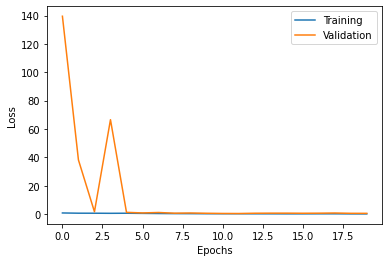

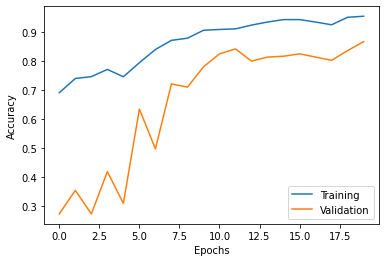

In [ ]:
plot (history_resnet)

In [ ]:
predicted_labels_1=model_resnet.predict(test_images)
model_resnet.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 91ms/step - loss: 0.5965 - accuracy: 0.8455


[0.5965491533279419, 0.8455055952072144]

###Evaluation Metrices for Resnet model

Confusion Matrix  [[ 72  22  10]
 [  8 142   9]
 [  0   6  87]]

Accuracy  0.8455056179775281

Recall  [0.69230769 0.89308176 0.93548387]

Precision  [0.9        0.83529412 0.82075472]

F1-score  [0.7826087  0.86322188 0.87437186]

Specificity  [0.96825397 0.85786802 0.92775665]


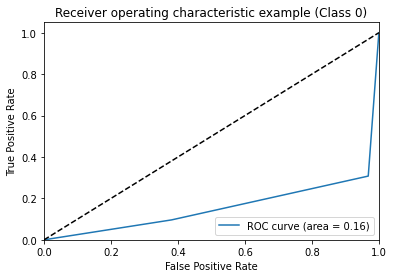

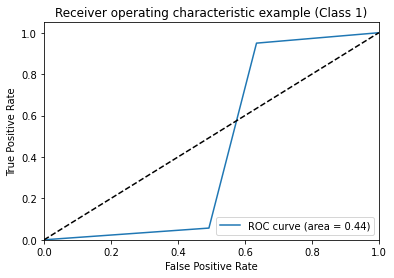

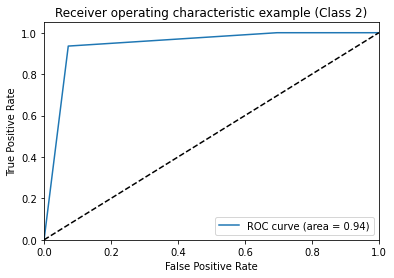

In [ ]:
metrics(predicted_labels_1,test_labels)

## Xception model

In [ ]:
#model using Xception
from tensorflow.keras.applications.xception import Xception
import tensorflow.keras as K

In [ ]:
input_t = K.Input(shape=(224,224,3))
xce_model = Xception(
    include_top = False,
    weights = "imagenet",
    input_tensor= input_t
)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
def create_model_xce():
  model = K.models.Sequential()
  model.add(xce_model)
  model.add(K.layers.Flatten())
  model.add(K.layers.BatchNormalization())
  model.add(K.layers.Dense(256, activation='relu'))
  model.add(K.layers.Dropout(0.5))
  model.add(K.layers.BatchNormalization())
  model.add(K.layers.Dense(128, activation='relu'))
  model.add(K.layers.Dense(3, activation='softmax'))
  return model

In [ ]:
model_xception = create_model_xce()
model_xception.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_100 (Bat (None, 100352)            401408    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_101 (Bat (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
model_xception.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_xception = model_xception.fit(train_images, train_labels, epochs=20, 
                    validation_data=(val_images, val_labels))

Epoch 1/20
89/89 [==============================] - 69s 694ms/step - loss: 0.6749 - accuracy: 0.7209 - val_loss: 0.7267 - val_accuracy: 0.7331
Epoch 2/20
89/89 [==============================] - 57s 636ms/step - loss: 0.4747 - accuracy: 0.8162 - val_loss: 0.7680 - val_accuracy: 0.7303
Epoch 3/20
89/89 [==============================] - 57s 639ms/step - loss: 0.3400 - accuracy: 0.8759 - val_loss: 0.3470 - val_accuracy: 0.8567
Epoch 4/20
89/89 [==============================] - 57s 642ms/step - loss: 0.2690 - accuracy: 0.9033 - val_loss: 0.3403 - val_accuracy: 0.8764
Epoch 5/20
89/89 [==============================] - 57s 637ms/step - loss: 0.2189 - accuracy: 0.9192 - val_loss: 0.3975 - val_accuracy: 0.8624
Epoch 6/20
89/89 [==============================] - 57s 635ms/step - loss: 0.2078 - accuracy: 0.9262 - val_loss: 0.4453 - val_accuracy: 0.8371
Epoch 7/20
89/89 [==============================] - 57s 638ms/step - loss: 0.1894 - accuracy: 0.9339 - val_loss: 0.3572 - val_accuracy: 0.9101

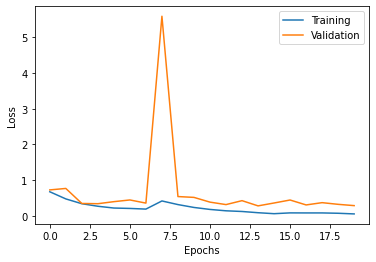

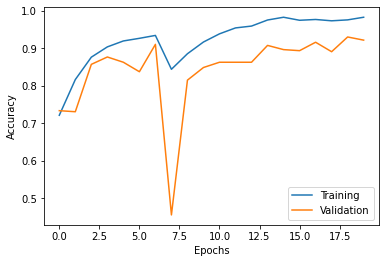

In [ ]:
plot(history_xception)

In [ ]:
model_xception.save('/content/drive/MyDrive/model_xception.h5')
#model with test acc 89%

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
predicted_labels_2=model_xception.predict(test_images)
model_xception.evaluate(test_images,test_labels)

12/12 [==============================] - 2s 125ms/step - loss: 0.3722 - accuracy: 0.8933


[0.3722130358219147, 0.8932584524154663]

###Evaluation Metrices for Xception model

Confusion Matrix  [[ 96   7   1]
 [ 16 132  11]
 [  2   1  90]]

Accuracy  0.8932584269662921

Recall  [0.92307692 0.83018868 0.96774194]

Precision  [0.84210526 0.94285714 0.88235294]

F1-score  [0.88073394 0.88294314 0.92307692]

Specificity  [0.92857143 0.95939086 0.95437262]


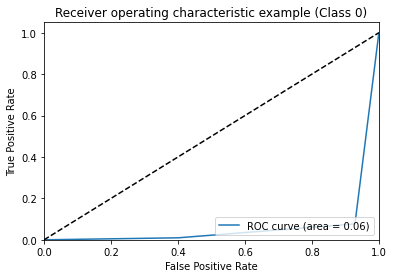

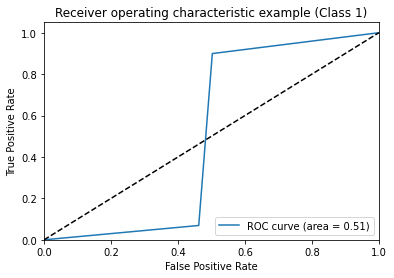

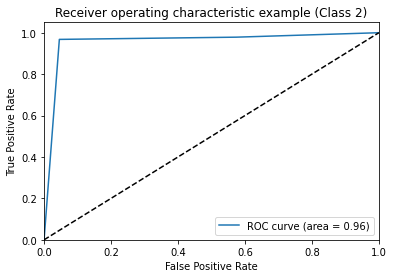

In [ ]:
metrics(predicted_labels_2,test_labels)

##InceptionV3 model

In [ ]:
#model using InceptionV3
import tensorflow.keras as K
from tensorflow.keras.applications.inception_v3 import InceptionV3
input_layer = K.Input(shape=(224,224,3))
inc_model = InceptionV3(
    include_top = False,
    weights = "imagenet",
    input_tensor= input_layer
)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
def create_model_inception():
  model = K.models.Sequential()
  model.add(inc_model)
  model.add(K.layers.Flatten())
  model.add(K.layers.BatchNormalization())
  model.add(K.layers.Dense(256, activation='relu'))
  model.add(K.layers.Dropout(0.5))
  model.add(K.layers.BatchNormalization())
  model.add(K.layers.Dense(128, activation='relu'))
  model.add(K.layers.Dense(3, activation='softmax'))
  return model

In [ ]:
model_inception = create_model_inception()
model_inception.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 51200)             204800    
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_95 (Batc (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [ ]:
model_inception.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_inception = model_inception.fit(train_images, train_labels, epochs=20, 
                    validation_data=(val_images, val_labels))

Epoch 1/20
89/89 [==============================] - 67s 301ms/step - loss: 0.7354 - accuracy: 0.6808 - val_loss: 5.9396 - val_accuracy: 0.3230
Epoch 2/20
89/89 [==============================] - 23s 258ms/step - loss: 0.5334 - accuracy: 0.8000 - val_loss: 4.1568 - val_accuracy: 0.6994
Epoch 3/20
89/89 [==============================] - 23s 260ms/step - loss: 0.4125 - accuracy: 0.8464 - val_loss: 2.4502 - val_accuracy: 0.7865
Epoch 4/20
89/89 [==============================] - 24s 266ms/step - loss: 0.4053 - accuracy: 0.8520 - val_loss: 0.5155 - val_accuracy: 0.8258
Epoch 5/20
89/89 [==============================] - 23s 264ms/step - loss: 0.3762 - accuracy: 0.8506 - val_loss: 2.3582 - val_accuracy: 0.6320
Epoch 6/20
89/89 [==============================] - 23s 261ms/step - loss: 0.2845 - accuracy: 0.8896 - val_loss: 0.3097 - val_accuracy: 0.8792
Epoch 7/20
89/89 [==============================] - 24s 267ms/step - loss: 0.2488 - accuracy: 0.9051 - val_loss: 0.3588 - val_accuracy: 0.8708

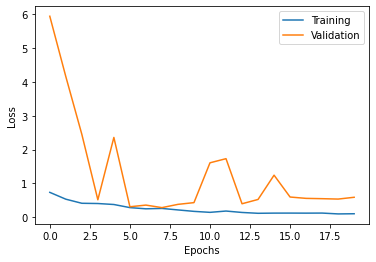

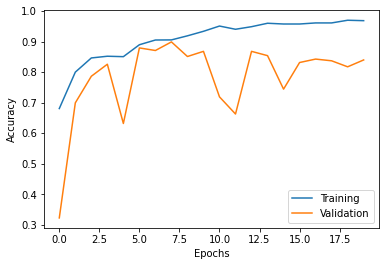

In [ ]:
plot(history_inception)

In [ ]:
predicted_labels_3=model_inception.predict(test_images)
model_inception.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 72ms/step - loss: 0.6159 - accuracy: 0.7725


[0.6159102916717529, 0.7724719047546387]

###Evaluation Metrices for InceptionV3 model

Confusion Matrix  [[ 93  11   0]
 [ 28 130   1]
 [  0  41  52]]

Accuracy  0.7724719101123596

Recall  [0.89423077 0.81761006 0.55913978]

Precision  [0.76859504 0.71428571 0.98113208]

F1-score  [0.82666667 0.76246334 0.71232877]

Specificity  [0.88888889 0.73604061 0.99619772]


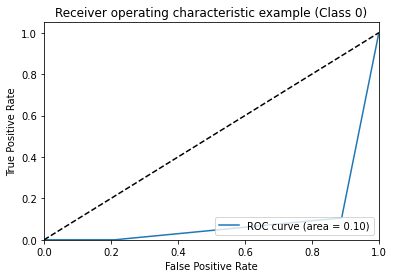

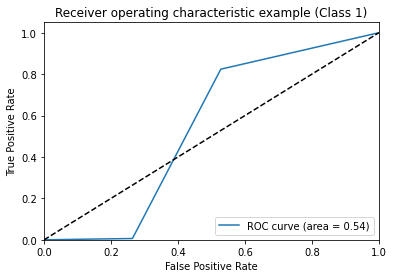

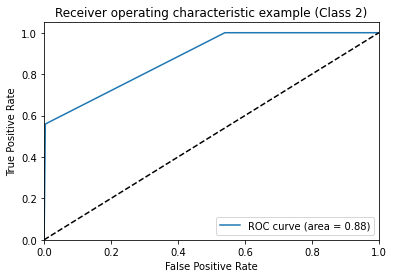

In [ ]:
metrics(predicted_labels_3,test_labels)

## Evaluation metrics

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Accuracy
from sklearn.metrics import accuracy_score

# Recall
from sklearn.metrics import recall_score

# Precision
from sklearn.metrics import precision_score

# F1 score
from sklearn.metrics import f1_score

#ROC curve
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import RocCurveDisplay

#Classification Report
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [ ]:
def roc(y_test, y_prob_pred_cnb):
  # roc curve for classes
  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 3

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
      
  # plotting    
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Normal vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Pneumonia vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Covid vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')  

In [ ]:
def ROC(test_labels,preds):
      for i in range(3):
        fpr, tpr, thresholds = roc_curve(test_labels, preds, pos_label=i)
        plt.figure()
        plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example (Class %i)'%i)
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def metrics1(predicted_labels,test_labels,y_prob_pred_cnb):
  preds=np.zeros(test_labels.shape)
  for i in range(len(predicted_labels)):
    preds[i]=np.argmax(predicted_labels[i])
  cnf_matrix=confusion_matrix(test_labels, preds)
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)
  print("Confusion Matrix ",cnf_matrix)
  
  print("Accuracy ",accuracy_score(test_labels, preds))
  print()
  print("Recall ",recall_score(test_labels, preds, average=None))
  print()
  print("Precision ",precision_score(test_labels, preds, average=None))
  print()
  print("F1-score ",f1_score(test_labels, preds, average=None))
  print()
  print("Specificity ",TN/(TN + FP))
  print()
  print("Classification Report\n")
  print(classification_report(test_labels, preds, target_names=['Normal', 'Pneumonia', 'Covid']))
  print()
  print("ROC curve")
  roc(test_labels, y_prob_pred_cnb)

In [ ]:
import tensorflow as tf

new_model = tf.keras.models.load_model('/content/drive/MyDrive/model_xception.h5')

In [ ]:
predicted_labels_new=new_model.predict(test_images)
y_prob_pred_cnb = new_model.predict_proba(test_images)

new_model.evaluate(test_images,test_labels)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


12/12 [==============================] - 2s 112ms/step - loss: 0.3791 - accuracy: 0.8933


[0.37913593649864197, 0.8932584524154663]

Confusion Matrix  [[ 96   5   3]
 [ 18 133   8]
 [  2   2  89]]
Accuracy  0.8932584269662921

Recall  [0.92307692 0.83647799 0.95698925]

Precision  [0.82758621 0.95       0.89      ]

F1-score  [0.87272727 0.88963211 0.92227979]

Specificity  [0.92063492 0.96446701 0.9581749 ]

Classification Report

              precision    recall  f1-score   support

      Normal       0.83      0.92      0.87       104
   Pneumonia       0.95      0.84      0.89       159
       Covid       0.89      0.96      0.92        93

    accuracy                           0.89       356
   macro avg       0.89      0.91      0.89       356
weighted avg       0.90      0.89      0.89       356


ROC curve


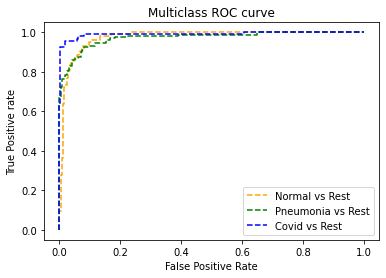

In [ ]:
metrics1(predicted_labels_new,test_labels,y_prob_pred_cnb)

Confusion Matrix  [[ 96   5   3]
 [ 14 138   7]
 [  4   1  88]]
Confusion matrix, without normalization
[[ 96   5   3]
 [ 14 138   7]
 [  4   1  88]]

Accuracy  0.9044943820224719

Recall  [0.92307692 0.86792453 0.94623656]

Precision  [0.84210526 0.95833333 0.89795918]

F1-score  [0.88073394 0.91089109 0.92146597]

Specificity  [0.92857143 0.96954315 0.96197719]

Classification Report

              precision    recall  f1-score   support

      Normal       0.84      0.92      0.88       104
    Pnemonia       0.96      0.87      0.91       159
       Covid       0.90      0.95      0.92        93

    accuracy                           0.90       356
   macro avg       0.90      0.91      0.90       356
weighted avg       0.91      0.90      0.90       356


ROC curve


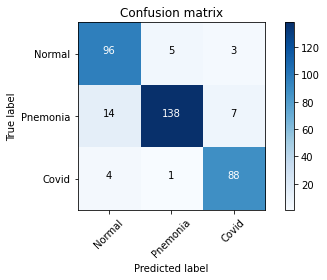

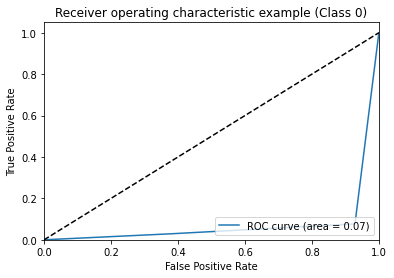

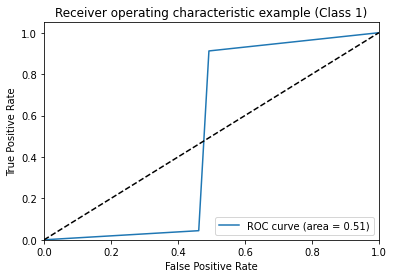

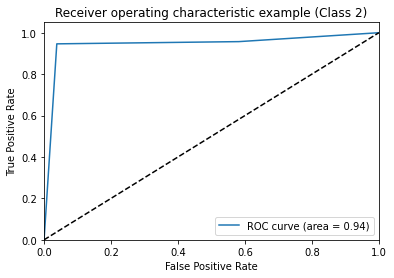

In [ ]:
metrics1(predicted_labels_new,test_labels)